**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(yhat^{(i)}, y^{(i)}) =  - y^{(i)}  \log(yhat^{(i)}) + (1-y^{(i)} )  \log(1-yhat^{(i)})\tag{3}$$

The cost is then computing:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(yhat^{(i)}, y^{(i)})\tag{6}$$

Gradient Computing:
- $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(yhat-Y)^T\tag{7}$$
- $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (yhat^{(i)}-y^{(i)})\tag{8}$$


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
A = np.random.randn(3,2)

B = np.sum(A, axis = 1, keepdims = True) 

In [3]:
B.shape

(3, 1)

## Weight and bias initializer

In [4]:
def w_b_init(dim: int):
    w = tf.zeros([dim, 1], dtype=tf.float64)
    b = 0.0
    return w, b


In [5]:
w, b = w_b_init(3)
w, b


(<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
 array([[0.],
        [0.],
        [0.]])>,
 0.0)

## Calculate $z$ for all $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$

In [6]:
def z_calc(w: tf.Tensor, b: tf.float64, x: tf.Tensor):
    z = tf.tensordot(tf.transpose(w), x, axes=1) + b
    return z


In [7]:
w , b = w_b_init(3)
x = tf.Variable([3, 2, 4], dtype=tf.float64)
z_calc(w, b, x)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.])>

# Sigmoid Funtion
compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp() or tf.exp().

In [8]:
def sigmoid(z: tf.Tensor) -> tf.Tensor:
    s = 1/(1 + tf.exp(-z))
    return s

In [9]:
z = z_calc(w, b, x)
sigmoid(z)

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([0.5])>

## Calculate the Cost :
 $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(yhat^{(i)})+(1-y^{(i)})\log(1-yhat^{(i)}))$

In [10]:
def cost(yhat:tf.Tensor, y:tf.Tensor):
    loss = tf.reduce_sum((y * tf.math.log(yhat)) + ((1-y) * tf.math.log(1-yhat)))
    c = (-1/yhat.shape[0]) * loss
    return c

## Forward Propagation:
- You get X
- You compute $yhat = \sigma(w^T X + b) $
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(yhat^{(i)})+(1-y^{(i)})\log(1-yhat^{(i)}))$

In [11]:
def forward_propagation(w: tf.Tensor, b: tf.float64, x: tf.Tensor, y: tf.Tensor):
    z = z_calc(w, b, x)
    yhat = sigmoid(z)
    c = cost(yhat, y)
    return yhat, tf.squeeze(c)


## Back Propagation: 

- $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(yhat-y)^T\tag{7}$$
- $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (yhat^{(i)}-y^{(i)})\tag{8}$$

In [12]:
def back_propagation(x: tf.Tensor, y: tf.Tensor, yhat: tf.Tensor):
    m = y.shape[0]
    dw = (1/m) * tf.tensordot(x, tf.transpose(yhat - y), axes=1)
    db = (1/m) * tf.reduce_sum(yhat - y)
    return {'dw': dw, 'db': db}


# Optimizer

In [13]:
def optimize(w, b, x, y, num_iterations=100, learning_rate=0.009):

    for epoch in range(num_iterations):
        yhat, loss = forward_propagation(w, b, x, y)
        grads = back_propagation(x, y, yhat)
        w = w - learning_rate * grads['dw']
        b = b - learning_rate * grads['db']
        if epoch % 10 == 0:
            print(f"Epoch: {epoch} => Loss: {loss}")
    return w, b, grads, loss


In [14]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
optimize(w, b, X, Y, num_iterations=400, learning_rate = 0.009)

Epoch: 0 => Loss: 0.47701613123077213
Epoch: 10 => Loss: 0.4164531274535226
Epoch: 20 => Loss: 0.367523498948689
Epoch: 30 => Loss: 0.3275456740982752
Epoch: 40 => Loss: 0.2945102061378818
Epoch: 50 => Loss: 0.26691094275228944
Epoch: 60 => Loss: 0.24361332072642702
Epoch: 70 => Loss: 0.2237560544308519
Epoch: 80 => Loss: 0.20667926683465648
Epoch: 90 => Loss: 0.19187237397489834
Epoch: 100 => Loss: 0.17893631895908704
Epoch: 110 => Loss: 0.167556102524381
Epoch: 120 => Loss: 0.15748067635971635
Epoch: 130 => Loss: 0.14850811044843798
Epoch: 140 => Loss: 0.14047455659043903
Epoch: 150 => Loss: 0.13324596273006736
Epoch: 160 => Loss: 0.12671179611607164
Epoch: 170 => Loss: 0.12078024571170254
Epoch: 180 => Loss: 0.1153745232473739
Epoch: 190 => Loss: 0.11042998727123679
Epoch: 200 => Loss: 0.10589188895569433
Epoch: 210 => Loss: 0.10171359152781864
Epoch: 220 => Loss: 0.09785515338863691
Epoch: 230 => Loss: 0.09428219267242786
Epoch: 240 => Loss: 0.0909649712233753
Epoch: 250 => Loss: 0

(<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[0.0966967 ],
        [2.27572291]])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=1.9455882442473833>,
 {'dw': <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
  array([[ 0.10104914],
         [-0.04072141]])>,
  'db': <tf.Tensor: shape=(), dtype=float64, numpy=-0.04856141334469418>},
 <tf.Tensor: shape=(), dtype=float64, numpy=0.058710945448840236>)

# Model
- Initialize $$ w,b $$
- Forward Propagation:
    - You get X
    - You compute $yhat = \sigma(w^T X + b) $
    - You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(yhat^{(i)})+(1-y^{(i)})\log(1-yhat^{(i)}))$
- Back Propagation: 
    - $$ \frac{\partial J}{\partial w} = \frac{1}{m}X(yhat-y)^T\tag{7}$$
    - $$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (yhat^{(i)}-y^{(i)})\tag{8}$$
- Update weights:
    - $$ w = w - {\alpha} * \frac{\partial J}{\partial w} $$
    - $$ b = b- {\alpha}  * \frac{\partial J}{\partial b} $$

In [1]:
class Model:
    def __init__(self, dim: int):
        self.w, self.b = tf.random.normal(
            [dim, 1], dtype=tf.float64, seed=42), 0.0
        self.params = dict()
        self.cost = None
        self.losses = list()
        self.metric = [[0.0, ], [0.0, ]]

    def forward(self, x: tf.Tensor):
        z = tf.tensordot(tf.transpose(self.w), x, axes=1) + self.b
        return 1/(1 + tf.exp(-z))

    def forward_propagation(self, w: tf.Tensor, b: tf.float64, x: tf.Tensor, y: tf.Tensor):
        yhat = self.forward(x)
        loss = tf.reduce_sum((y * tf.math.log(yhat)) +
                             ((1-y) * tf.math.log(1-yhat)))
        cost = (-1/y.shape[0]) * loss
        return yhat, tf.squeeze(cost)

    def back_propagation(self, x: tf.Tensor, y: tf.Tensor, yhat: tf.Tensor):
        m = y.shape[0]
        dw = (1/m) * tf.tensordot(x, tf.transpose(yhat - y), axes=1)
        db = (1/m) * tf.reduce_sum(yhat - y)
        return {'dw': dw, 'db': db}

    def evaluate(self, ytrain, ytrain_pred, ytest, ytest_pred):
        train_acc = 100 - np.mean(np.abs(ytrain_pred - ytrain)) * 100
        test_acc = 100 - np.mean(np.abs(ytest_pred - ytest)) * 100
        return train_acc, test_acc

    def optimize(self, x, y, validation=None, num_iterations=100, learning_rate=0.009):
        for epoch in range(num_iterations):
            yhat, self.cost = self.forward_propagation(
                self.w, self.b, x, y)
            grads = self.back_propagation(x, y, yhat)
            self.w = self.w - learning_rate * grads['dw']
            self.b = self.b - learning_rate * grads['db']
            self.losses.append(self.cost)
            if epoch % 10 == 0:
                ytest_pred = self.predict(validation[0])
                train_acc, test_acc = self.evaluate(
                    y, tf.round(yhat), validation[1], ytest_pred)
                print(
                    f"Epoch: {epoch} => Train Accuraccy: {train_acc:.2f}% || Test Accuracy:{test_acc:.2f}% || Loss: {self.cost}")
                self.metric[0].append(train_acc)
                self.metric[1].append(test_acc)
        self.params['w'] = self.w
        self.params['b'] = self.b
        return self.w, self.b, grads, self.cost

    def predict(self, x: tf.Tensor):
        return tf.round(self.forward(x)['A2'])


NameError: name 'tf' is not defined

In [16]:
X = tf.Variable([
    [1., -2., -1., 3.4],
    [3., 0.5, -3.2, 2.5]
], dtype=tf.float64)
Y = np.array([1, 1, 0, 1])
xv = tf.Variable([
    [-1.3, 3.1],
    [-3.6, 2.1]
], dtype=tf.float64)
yv = np.array([0, 1])
model = Model(2)
model.optimize(X, Y, validation=(xv, yv), num_iterations=100)

Epoch: 0 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 1.315912193032579
Epoch: 10 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 1.130260498619716
Epoch: 20 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 0.9856022946926002
Epoch: 30 => Train Accuraccy: 25.00% || Test Accuracy:50.00% || Loss: 0.8726790689316903
Epoch: 40 => Train Accuraccy: 50.00% || Test Accuracy:100.00% || Loss: 0.7836236894709461
Epoch: 50 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.7122113259589877
Epoch: 60 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.653783792902152
Epoch: 70 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.6049739804328483
Epoch: 80 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.5633875293801394
Epoch: 90 => Train Accuraccy: 75.00% || Test Accuracy:100.00% || Loss: 0.5273272263749174


(<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
 array([[0.67251638],
        [0.15194723]])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.19555566275624162>,
 {'dw': <tf.Tensor: shape=(2, 1), dtype=float64, numpy=
  array([[ 0.20437155],
         [-0.50945549]])>,
  'db': <tf.Tensor: shape=(), dtype=float64, numpy=-0.18376851092327232>},
 <tf.Tensor: shape=(), dtype=float64, numpy=0.4985905148418581>)

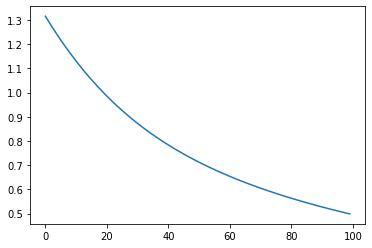

In [17]:
plt.plot(model.losses)

# Test Model

In [18]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
x, y = datasets.load_breast_cancer(return_X_y=True)
x = StandardScaler().fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, random_state=33, test_size=0.3
)


In [20]:
xtrain = tf.Variable(xtrain.T, dtype=tf.float64)
xtest = tf.Variable(xtest.T, dtype=tf.float64)


In [21]:
model = Model(xtrain.shape[0])
model.optimize(xtrain, ytrain, validation=(xtest, ytest),
               num_iterations=1000, learning_rate=0.01)


Epoch: 0 => Train Accuraccy: 20.35% || Test Accuracy:23.39% || Loss: 4.673907349138036
Epoch: 10 => Train Accuraccy: 22.86% || Test Accuracy:26.32% || Loss: 4.063799169424005
Epoch: 20 => Train Accuraccy: 26.88% || Test Accuracy:30.99% || Loss: 3.506552407958166
Epoch: 30 => Train Accuraccy: 31.66% || Test Accuracy:36.26% || Loss: 3.0072342778657655
Epoch: 40 => Train Accuraccy: 36.18% || Test Accuracy:42.69% || Loss: 2.5699018216869467
Epoch: 50 => Train Accuraccy: 41.71% || Test Accuracy:46.78% || Loss: 2.199415067361854
Epoch: 60 => Train Accuraccy: 46.98% || Test Accuracy:54.97% || Loss: 1.894998914351612
Epoch: 70 => Train Accuraccy: 50.75% || Test Accuracy:58.48% || Loss: 1.6492518872434194
Epoch: 80 => Train Accuraccy: 54.52% || Test Accuracy:63.16% || Loss: 1.4536080360137926
Epoch: 90 => Train Accuraccy: 59.55% || Test Accuracy:65.50% || Loss: 1.2996838418950163
Epoch: 100 => Train Accuraccy: 63.82% || Test Accuracy:67.84% || Loss: 1.1788923677520282
Epoch: 110 => Train Accura

(<tf.Tensor: shape=(30, 1), dtype=float64, numpy=
 array([[-0.12113846],
        [-0.08578507],
        [-2.70153131],
        [ 0.79906941],
        [-0.15496253],
        [-0.06563128],
        [-0.57845672],
        [ 0.27902399],
        [ 0.06640168],
        [ 0.71361649],
        [-0.37160711],
        [-0.71665007],
        [ 0.37958917],
        [-0.07339077],
        [ 1.2232992 ],
        [-1.34550852],
        [ 0.37824697],
        [ 0.95300196],
        [-0.75431282],
        [-0.03231322],
        [-0.43579806],
        [-0.95924001],
        [-1.75479686],
        [-1.84726195],
        [-0.45546086],
        [ 1.84486309],
        [-0.46323464],
        [-0.209828  ],
        [ 0.64249136],
        [-3.47029986]])>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.4462589375572441>,
 {'dw': <tf.Tensor: shape=(30, 1), dtype=float64, numpy=
  array([[ 0.01623266],
         [-0.00196918],
         [ 0.01532433],
         [ 0.01646813],
         [ 0.02617006],
         [-0.00

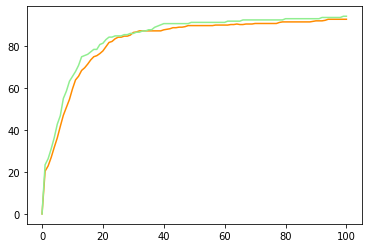

In [22]:
plt.figure()
plt.plot(model.metric[0], color='darkorange')
plt.plot(model.metric[1], color='lightgreen')
plt.show()

In [23]:
model.params


{'w': <tf.Tensor: shape=(30, 1), dtype=float64, numpy=
 array([[-0.12113846],
        [-0.08578507],
        [-2.70153131],
        [ 0.79906941],
        [-0.15496253],
        [-0.06563128],
        [-0.57845672],
        [ 0.27902399],
        [ 0.06640168],
        [ 0.71361649],
        [-0.37160711],
        [-0.71665007],
        [ 0.37958917],
        [-0.07339077],
        [ 1.2232992 ],
        [-1.34550852],
        [ 0.37824697],
        [ 0.95300196],
        [-0.75431282],
        [-0.03231322],
        [-0.43579806],
        [-0.95924001],
        [-1.75479686],
        [-1.84726195],
        [-0.45546086],
        [ 1.84486309],
        [-0.46323464],
        [-0.209828  ],
        [ 0.64249136],
        [-3.47029986]])>,
 'b': <tf.Tensor: shape=(), dtype=float64, numpy=0.4462589375572441>}

In [24]:
ypred = model.predict(xtest)[0]
ypred == ytest

<tf.Tensor: shape=(171,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, Fal

In [25]:
model.metric

[[0.0,
  20.35175879396985,
  22.8643216080402,
  26.884422110552762,
  31.65829145728644,
  36.18090452261307,
  41.708542713567844,
  46.984924623115575,
  50.753768844221106,
  54.52261306532663,
  59.54773869346734,
  63.81909547738693,
  65.57788944723617,
  68.34170854271358,
  69.59798994974875,
  71.35678391959799,
  73.36683417085428,
  74.87437185929649,
  75.37688442211055,
  76.3819095477387,
  77.63819095477388,
  79.64824120603015,
  81.65829145728644,
  82.1608040201005,
  83.41708542713567,
  84.17085427135679,
  84.17085427135679,
  84.67336683417085,
  84.67336683417085,
  85.17587939698493,
  86.4321608040201,
  86.68341708542714,
  87.1859296482412,
  87.1859296482412,
  87.1859296482412,
  87.1859296482412,
  87.1859296482412,
  87.1859296482412,
  87.1859296482412,
  87.1859296482412,
  87.68844221105527,
  87.93969849246231,
  88.19095477386935,
  88.69346733668341,
  88.69346733668341,
  88.94472361809045,
  88.94472361809045,
  89.19597989949749,
  89.698492462

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true=ytest, y_pred=ypred)

0.9415204678362573